In [1]:
import pandas as pd
pays = pd.read_csv("/Users/admin/Documents/GitHub/Data_NA_project/supervised.csv")  # dict: nom_feuille -> DataFrame
pays



,Country,Quality Score,SDGi,Life Expectancy,HDI,Per Capita GDP,Region,Income Group,Population (millions),Cropland Footprint,...,Cropland,Grazing land,Forest land,Fishing ground,Built up land.2,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required,actual \nCountry Overshoot Day \n2018
0,Albania,3A,71.0,78.4580,0.792,5046.032611084467,Other Europe,UM,2.882740,0.362065,...,0.362065,0.195718,0.310590,0.082072,0.042248,0.992693,-0.893765,1.191981,1.900343,1900-11-01 05:06:29.557
1,Algeria,3A,70.9,76.6930,0.746,4759.830053642441,Africa,UM,42.228398,0.249653,...,0.249653,0.249356,0.025333,0.007541,0.037283,0.569166,-1.771742,1.479132,4.112872,1900-09-02 18:23:39.042
2,Argentina,3A,72.8,76.5200,0.842,10076.39540623727,South America,UM,44.361102,2.207423,...,2.207423,1.721421,0.609912,1.548194,0.092705,6.179656,2.867910,2.092567,0.535911,1900-06-22 10:14:45.914
3,Armenia,3A,71.8,74.9450,0.771,4406.741763360718,Middle East/Central Asia,LM,2.951750,0.208557,...,0.208557,0.263465,0.092649,0.015682,0.035763,0.616116,-1.284276,1.200786,3.084469,1900-10-29 23:13:22.549
4,Australia,3A,75.6,82.7488,0.943,57032.23705153124,Asia-Pacific,HI,24.898199,1.921158,...,1.921158,4.613393,1.959529,2.936743,0.040870,11.471694,4.385655,4.477400,0.617698,1900-03-21 12:29:34.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,United Kingdom,3A,80.0,81.2561,0.928,42894.35426799058,EU,HI,67.141703,0.397249,...,0.397249,0.102704,0.116913,0.284563,0.126236,1.027666,-3.151658,2.640756,4.066811,1900-05-17 05:13:53.109
105,United States of America,3A,76.0,78.6390,0.925,54723.9954019615,North America,HI,327.096000,1.257497,...,1.257497,0.251621,1.484395,0.320084,0.072306,3.385902,-4.736481,5.132226,2.398883,1900-03-11 02:51:41.888
106,Uzbekistan,3A,69.8,71.5730,0.717,2408.6100554167856,Middle East/Central Asia,LM,32.476199,0.364525,...,0.364525,0.164676,0.056412,0.009393,0.063725,0.658730,-1.379636,1.287967,3.094387,1900-10-09 09:25:03.291
107,"Venezuela, Bolivarian Republic of",3A,59.3,72.1280,0.733,-,South America,UM,28.887100,0.114158,...,0.114158,0.592644,1.773475,0.250736,0.029452,2.760465,0.368853,1.511169,0.866380,1900-08-28 12:50:08.837


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def load_mydf():
    df = pd.read_excel("/Users/admin/Desktop/MIASHS/MasterM1SSD/ProjetNA/NA.xlsx", sheet_name=None)  # dict: nom_feuille -> DataFrame

    df = df["Feuille 1"]
    
    rename_dict = {
        "actual \nCountry Overshoot Day \n2018": "Overshoot Day",
        "Cropland Footprint": "Cropland_Footprint_Production",
        "Cropland Footprint.1": "Cropland_Footprint_Consumption",
        "Cropland": "Cropland_Biocapacity",
        "Grazing Footprint": "Grazing_Footprint_Production",
        "Grazing Footprint.1": "Grazing_Footprint_Consumption",
        "Grazing land": "Grazing_Biocapacity",
        "Forest Product Footprint": "Forest_Footprint_Production",
        "Forest Product Footprint.1": "Forest_Footprint_Consumption",
        "Forest land": "Forest_Biocapacity",
        "Fish Footprint": "Fish_Footprint_Production",
        "Fish Footprint.1": "Fish_Footprint_Consumption",
        "Fishing ground": "Fishing_Biocapacity",
        "Built up land": "BuiltUp_Footprint_Production",
        "Built up land.1": "BuiltUp_Footprint_Consumption",
        "Built up land.2": "BuiltUp_Biocapacity",
        "Carbon Footprint": "Carbon_Footprint_Production",
        "Carbon Footprint.1": "Carbon_Footprint_Consumption",
        "Total Ecological Footprint (Production)": "Total_Footprint_Production",
        "Total Ecological Footprint (Consumption)": "Total_Footprint_Consumption",
        "Total biocapacity": "Total_Biocapacity"
    }

    df = df.rename(columns={c: rename_dict[c] for c in df.columns if c in rename_dict})

    
    force_text = {"Country", "Region", "Income Group", "Overshoot Day", "Quality Score"}

    
    def clean_numeric_series(s):
        """Convert messy strings to floats, ignore non-numeric columns."""
        if s.dtype != object:
            return s

        st = s.astype(str).str.strip()
        st = st.replace(["-", "--", "", "…"], None)

        
        if not st.str.contains(r"\d").any():
            return pd.to_numeric(st, errors="coerce")

        
        st = (
            st.str.replace("\u202f", "", regex=False)
            .str.replace(" ", "", regex=False)
            .str.replace(",", ".", regex=False)
            .str.replace("$", "", regex=False)
            .str.replace("−", "-", regex=False)
            .str.replace("%", "", regex=False)
        )
        return pd.to_numeric(st, errors="coerce")

    
    for col in df.columns:
        if col not in force_text:
            df[col] = clean_numeric_series(df[col])

    return df




df = load_mydf()


def overshoot_to_doy(s):
    """Convert 'Month Day, 1900' to day-of-year (1–365)."""
    if pd.isna(s):
        return None
    dt = pd.to_datetime(s, errors="coerce")
    if pd.isna(dt):
        return None
    return dt.dayofyear


df["Overshoot_Day_DOY"] = df["Overshoot Day"].apply(overshoot_to_doy)



target = "Overshoot_Day_DOY"

df = df[df[target].notna()]
X_cols = [col for col in df.columns if col != target]
df_clean = df.replace("-", np.nan)
df_supervised = df.dropna(subset=X_cols + [target])

df_supervised = df.dropna(axis=0, how="any")

print(df_supervised)



                      Country Quality Score  SDGi  Life Expectancy    HDI  \
1                     Albania            3A  71.0          78.4580  0.792   
2                     Algeria            3A  70.9          76.6930  0.746   
5                   Argentina            3A  72.8          76.5200  0.842   
6                     Armenia            3A  71.8          74.9450  0.771   
7                   Australia            3A  75.6          82.7488  0.943   
..                        ...           ...   ...              ...    ...   
173      United Arab Emirates            3A  70.2          77.8140  0.889   
174            United Kingdom            3A  80.0          81.2561  0.928   
175  United States of America            3A  76.0          78.6390  0.925   
177                Uzbekistan            3A  69.8          71.5730  0.717   
180                  Viet Nam            3A  72.8          75.3170  0.700   

     Per Capita GDP                    Region Income Group  \
1       5046.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variable cible
y = df["Overshoot_Day_DOY"]

# Variables explicatives
X = df.drop(columns=["Overshoot_Day_DOY"])


In [4]:
# Importation de la base de donnée, une seule feuille dans le fichier donc pas de pbl
import pandas as pd

df = pd.read_excel("NA.xlsx")
print(type(df))  # vérifier que c'est bien un DataFrame

# Conversion en datetime
Y_col = 'actual \nCountry Overshoot Day \n2018'
df[Y_col] = pd.to_datetime(df[Y_col], errors='coerce')

# Extraire jour et mois
df['day'] = df[Y_col].dt.day
df['month'] = df[Y_col].dt.month

# Concaténer mois et jour en format "MM-DD"
df['Overshoot_day_month'] = df['month'].astype(str).str.zfill(2) + "-" + df['day'].astype(str).str.zfill(2)

df = df.drop(columns=['day', 'month'])

print(df.columns) 
print(df['Overshoot_day_month'])


<class 'pandas.core.frame.DataFrame'>
Index(['Country', 'Quality Score', 'SDGi', 'Life Expectancy', 'HDI',
       'Per Capita GDP', 'Region', 'Income Group', 'Population (millions)',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Product Footprint',
       'Fish Footprint', 'Built up land', 'Carbon Footprint',
       'Total Ecological Footprint (Production)', 'Cropland Footprint.1',
       'Grazing Footprint.1', 'Forest Product Footprint.1', 'Fish Footprint.1',
       'Built up land.1', 'Carbon Footprint.1',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.2',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required',
       'actual \nCountry Overshoot Day \n2018', 'Overshoot_day_month'],
      dtype='object')
0       nan-nan
1      11.0-1.0
2       9.0-2.0
3       nan-nan
4       5.0-3.0
         ...   
179    8.0-28.0

In [5]:

Y_col = "Overshoot_day_month"
df['id'] = df.index + 1

id_stockage =df['id']

# X_cols ne prend pas la colonne nom_pays + prend l id pour retrouver les pays
cols_to_include = df.columns[1:-3] # pas les 2 overshoulday

cols = [col for col in cols_to_include if col != Y_col]

X_cols = ['id'] + list(cols_to_include)

print(len(X_cols)) # si 32 alors ok
id_stockage

32


0        1
1        2
2        3
3        4
4        5
      ... 
179    180
180    181
181    182
182    183
183    184
Name: id, Length: 184, dtype: int64

In [6]:
import numpy as np

# on prend df en on supprime les lignes ou il y a des données NA parmis les X ou Y :

df["Per Capita GDP"] = (
    df["Per Capita GDP"]
    .replace("-", np.nan)
)

df["Overshoot_day_month"] = (
    df["Overshoot_day_month"]
    .replace("nan-nan", np.nan)
)

df["Per Capita GDP"] = pd.to_numeric(
    df["Per Capita GDP"], errors="coerce"
)

s_un = df.dropna(subset=X_cols + [Y_col])

print(len(s_un))

106


/var/folders/l1/y0tzrmfx4bsb8r87w3vkwrc40000gn/T/ipykernel_22294/3375722286.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("-", np.nan)


In [7]:
# Séparation X / y
X = s_un[X_cols]
y = s_un[Y_col]

# Avant d'apprendre, il faut gerer les colonnes non numeriques : 
for col in X_cols: 
    if df[col].dtype == 'object': 
        print(col) 
        
# Il y a donc 3 colonnes a gerer, elles sont catégorielles :

categorical_cols = ['Quality Score', 'Region', 'Income Group']

# Encodage
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

print(y)

Quality Score
Region
Income Group
1       11.0-1.0
2        9.0-2.0
5       6.0-22.0
6      10.0-29.0
7       3.0-21.0
         ...    
173     3.0-11.0
174     5.0-17.0
175     3.0-11.0
177     10.0-9.0
180     9.0-10.0
Name: Overshoot_day_month, Length: 106, dtype: object


In [8]:
print(len(X_encoded))
print(len(X_encoded.columns))

106
40


In [9]:
# Avant tout, convertir la target en numérique :
import pandas as pd

def month_day_to_numeric(s):
    """Convert 'month-day' string with possible floats to day-of-year (year=2018)."""
    if pd.isna(s):
        return None
    try:
        # séparer mois et jour
        month_str, day_str = s.split('-')
        # convertir en float puis en int
        month = int(float(month_str))
        day = int(float(day_str))
        # créer la date avec année 2018
        dt = pd.Timestamp(year=2018, month=month, day=day)
        return dt.dayofyear
    except:
        return None

# Appliquer à la colonne
print(y)
y = y.apply(month_day_to_numeric)

# Vérifier
print(y.head(100))

1       11.0-1.0
2        9.0-2.0
5       6.0-22.0
6      10.0-29.0
7       3.0-21.0
         ...    
173     3.0-11.0
174     5.0-17.0
175     3.0-11.0
177     10.0-9.0
180     9.0-10.0
Name: Overshoot_day_month, Length: 106, dtype: object
1      305
2      245
5      173
6      302
7       80
      ... 
163    244
167     76
168    284
169    171
170    116
Name: Overshoot_day_month, Length: 100, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    # je separe en 20% test et 80% train
    test_size=0.2, 
    # j'ai mit une graine afin d'avoir toujours les mêmes résultats
    random_state=123
)


print(np.unique(X_train.dtypes))

[dtype('bool') dtype('int64') dtype('float64')]


In [11]:
print(y_test[34])

from sklearn.linear_model import LinearRegression

model = LinearRegression()
train = model.fit(X_train, y_train)

# prédiction sur les données de X_test
y_pred = train.predict(X_test)
y_pred = y_pred.astype(int)  # convertit chaque élément en entier
print(y_pred)

151
[170  98 173 213 102 104 193 110 214  11 137  62 348 179 217 253  98 131
 327 239 308 132]


In [12]:
print(y_test - y_pred)

85     -46
44       2
103    -39
170    -97
158    -11
148      2
13     -49
8      -16
1       91
100     33
137    -30
7       18
51     -65
144      8
18    -107
64      -5
117      2
67       8
70     -11
35      71
34    -157
82     -10
Name: Overshoot_day_month, dtype: int64


In [13]:
import numpy as np

rms = np.sqrt(np.mean((y_test - y_pred)**2))
print(rms)

57.27445884828277


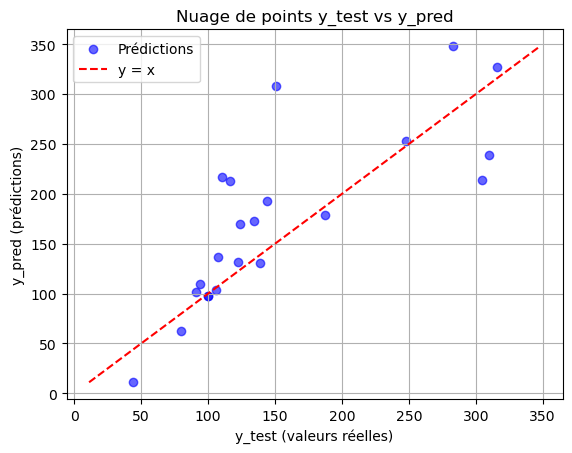

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Nuage de points
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Prédictions')

# Droite de régression y = x pour comparer
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Labels et titre
plt.xlabel('y_test (valeurs réelles)')
plt.ylabel('y_pred (prédictions)')
plt.title('Nuage de points y_test vs y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modèle de base
lr = LinearRegression()

# RFE pour sélectionner les 10 meilleures variables
selector = RFE(lr, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Variables sélectionnées
selected_features = X_train.columns[selector.support_]
print("Selected features:", list(selected_features))

# Modèle final
final_model = LinearRegression().fit(X_train[selected_features], y_train)
final_model


Selected features: ['HDI', 'Built up land', 'Cropland Footprint.1', 'Total Ecological Footprint (Consumption)', 'Region_Central America/Caribbean', 'Region_North America', 'Region_Other Europe', 'Region_South America', 'Income Group_LI', 'Income Group_LM']


LinearRegression()

Nous allons faire une AIC sur notre modèle

In [20]:
print(type(X_train))
print(type(y_train))

print(X_train.shape)
print(y_train.shape)

print(X_train.dtypes)
print(y_train.dtype)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(84, 40)
(84,)
id                                            int64
SDGi                                        float64
Life Expectancy                             float64
HDI                                         float64
Per Capita GDP                              float64
Population (millions)                       float64
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Fish Footprint                              float64
Built up land                               float64
Carbon Footprint                            float64
Total Ecological Footprint (Production)     float64
Cropland Footprint.1                        float64
Grazing Footprint.1                         float64
Forest Product Footprint.1                  float64
Fish Footprint.1                            float64
Built up land.1            

In [25]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
def stepwise_aic_backward(X, y, verbose=True):
    remaining = list(X.columns)
    best_aic = sm.OLS(y, sm.add_constant(X[remaining])).fit().aic

    if verbose:
        print(f"Initial AIC: {best_aic:.3f}")

    while True:
        aic_candidates = []

        for feature in remaining:
            candidates = [f for f in remaining if f != feature]
            model = sm.OLS(y, sm.add_constant(X[candidates])).fit()
            aic_candidates.append((model.aic, feature))

        aic_candidates.sort()
        best_new_aic, worst_feature = aic_candidates[0]

        if best_new_aic < best_aic:
            remaining.remove(worst_feature)
            best_aic = best_new_aic

            if verbose:
                print(f"Remove {worst_feature} → AIC = {best_aic:.3f}")
        else:
            break

    return remaining



In [35]:
vars_model = [
    "SDGi",
    "Life Expectancy",
    "HDI",
    "Per Capita GDP",
    "Population (millions)",

    # Production
    "Cropland Footprint",
    "Grazing Footprint",
    "Forest Product Footprint",
    "Fish Footprint",
    "Built up land",

    # Consumption
    "Cropland Footprint.1",
    "Grazing Footprint.1",
    "Forest Product Footprint.1",
    "Fish Footprint.1",

    # Biocapacity
    "Grazing land",
    "Forest land",
    "Fishing ground",

    "Ecological (Deficit) or Reserve",
    "Number of Countries required",
    "Income Group_LM",
    "Income Group_UM",
]



In [36]:
X_model = X_train[vars_model].copy()
y_model = y_train.copy()

# Bool → int (Income Group)
bool_cols = X_model.select_dtypes(include="bool").columns
X_model[bool_cols] = X_model[bool_cols].astype(int)

# Sécurité numérique
X_model = X_model.apply(pd.to_numeric, errors="coerce")

# Drop NA
data = pd.concat([X_model, y_model], axis=1).dropna()
X_model = data[X_model.columns]
y_model = data[y_model.name]

In [41]:
selected_features = stepwise_aic_backward(X_model, y_model)
print("\nSelected features:", selected_features)
X_final = sm.add_constant(X_model[selected_features])

final_model = sm.OLS(y_model, X_final).fit()
print(final_model.summary())


Initial AIC: 840.322
Remove Grazing Footprint → AIC = 838.324
Remove Forest Product Footprint → AIC = 836.328
Remove Number of Countries required → AIC = 834.378
Remove Fish Footprint.1 → AIC = 833.179
Remove Grazing Footprint.1 → AIC = 832.342
Remove Life Expectancy → AIC = 831.253
Remove Population (millions) → AIC = 830.839

Selected features: ['SDGi', 'HDI', 'Per Capita GDP', 'Cropland Footprint', 'Fish Footprint', 'Built up land', 'Cropland Footprint.1', 'Forest Product Footprint.1', 'Grazing land', 'Forest land', 'Fishing ground', 'Ecological (Deficit) or Reserve', 'Income Group_LM', 'Income Group_UM']
                             OLS Regression Results                            
Dep. Variable:     Overshoot_day_month   R-squared:                       0.905
Model:                             OLS   Adj. R-squared:                  0.885
Method:                  Least Squares   F-statistic:                     46.72
Date:                 Tue, 16 Dec 2025   Prob (F-statistic):    

In [43]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_aic(X, y, verbose=True):
    """
    Perform AIC-based forward + backward stepwise selection 
    (replicates R's stepAIC(direction = 'both')).
    
    Returns:
        List of selected variables
    """

    included = []
    best_aic = np.inf
    changed = True

    while changed:
        changed = False
        
        # --------------------------
        # 1. TRY ADDING VARIABLES
        # --------------------------
        excluded = list(set(X.columns) - set(included))
        add_results = []

        for col in excluded:
            model_vars = included + [col]
            model = sm.OLS(y, sm.add_constant(X[model_vars])).fit()
            add_results.append((model.aic, col))

        if add_results:
            add_results.sort()  # lowest AIC first
            best_new_aic, best_new_var = add_results[0]

            if best_new_aic < best_aic - 1e-6:  # strict improvement
                included.append(best_new_var)
                best_aic = best_new_aic
                changed = True
                if verbose:
                    print(f"➡️  ADD    {best_new_var:30} | AIC = {best_new_aic:.3f}")

        # --------------------------
        # 2. TRY REMOVING VARIABLES
        # --------------------------
        if len(included) > 1:
            remove_results = []

            for col in included:
                model_vars = [v for v in included if v != col]
                model = sm.OLS(y, sm.add_constant(X[model_vars])).fit()
                remove_results.append((model.aic, col))

            remove_results.sort()
            best_remove_aic, worst_var = remove_results[0]

            if best_remove_aic < best_aic - 1e-6:
                included.remove(worst_var)
                best_aic = best_remove_aic
                changed = True
                if verbose:
                    print(f"❌ REMOVE {worst_var:30} | AIC = {best_remove_aic:.3f}")

    return included 
selected_vars = stepwise_aic(X_model, y_model, verbose=True)

print("\n📌 Selected variables by AIC stepwise (both):")
print(selected_vars)
X_sel = sm.add_constant(X_model[selected_vars])
final_model = sm.OLS(y_model, X_sel).fit()

print("\n\n================ FINAL AIC STEPWISE MODEL ================")
print(final_model.summary())

➡️  ADD    HDI                            | AIC = 929.050
➡️  ADD    SDGi                           | AIC = 912.019
➡️  ADD    Forest Product Footprint.1     | AIC = 899.948
➡️  ADD    Grazing Footprint.1            | AIC = 887.186
➡️  ADD    Fish Footprint.1               | AIC = 877.478
➡️  ADD    Cropland Footprint.1           | AIC = 867.164
➡️  ADD    Built up land                  | AIC = 865.042
➡️  ADD    Population (millions)          | AIC = 864.102

📌 Selected variables by AIC stepwise (both):
['HDI', 'SDGi', 'Forest Product Footprint.1', 'Grazing Footprint.1', 'Fish Footprint.1', 'Cropland Footprint.1', 'Built up land', 'Population (millions)']


================ FINAL AIC STEPWISE MODEL ================
                             OLS Regression Results                            
Dep. Variable:     Overshoot_day_month   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.819
Method:                  Least Squ